# Artificial Intelligence Image Classification using FastAI

This CoLab notebook is intended for medical professionals who does not have any significant background in programming or artificial intelligence. 



---



Goal:

Create an artificial intelligence model to predict wheather a blood cell smear is infected with malaria or not.

Data:

Orginally collected by NLM at NIH.
For a complete description go to [NIH website.](https://ceb.nlm.nih.gov/repositories/malaria-datasets/)

Optional

To understand more about the data and to compare results of different algorithms, please [read this.](https://towardsdatascience.com/diagnose-malaria-from-cellphone-captured-microscopic-images-using-fastai-library-and-turicreate-ae0e27d579e6) 


---





We use excel to enter data and create graphs and Word to create documents. 
Think of FastAI as a software to that helps us to perform artificial intelligence operations. 

First let us import fastai to our CoLab notebook. 


In [0]:
from fastai.vision import *

Now we are going to use the 'wget' command to get the malaria microscope images from NIH website. It is stored as a ZIP file in the NIH server. 
If you want to run a command as if it is being run in command prompt / terminal use "!" before the command.

In [0]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2019-05-26 23:24:12--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  89.2MB/s    in 3.5s    

2019-05-26 23:24:15 (96.1 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



After executing the above line we should have a file called ‘cell_images.zip’ in our folder.

In the next line we are going to unzip the folder. 

This may take a few minutes.

In [0]:
!unzip cell_images.zip

Archive:  cell_images.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_201509

In the following line we list all the files in our current directory to make sure that "cell_images" folder is present.

"ls "- command to list files in current directory

"cell_images" folder has 2 sub folders "Parasitized" and "Uninfected". These folder names will act as labels for the 2 classes of pictures in our AI model.

In [0]:
!ls

cell_images  cell_images.zip  sample_data


We set the "path" variable to the folder 'cell_images'

In [0]:
path = 'cell_images'

In the next line we load the 2 sets of images "Parasitized" and "Uninfected" into a variable called data.
We provide the path to our image files using the 'path' variable which we defined earlier. 

valid_pct=0.2 = This splits the data into 2 parts. 80% of the data will be used for training and 20% of data will be used to validation.  AI model is created using the training set. This model is tested on Validation to make sure that the . model is progressing in the right direction. 

ds_tfms = get_treansforms(), size =224 = This line apply different tranformation like vertical and horizontal flips to the images in our database and resizes all images to 224 X 224. 

In [0]:

data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms() ,size=224).normalize(imagenet_stats)

Lets see how many images are in the training and validation sets


In [0]:

print('Train size:', len(data.train_ds))
print('Valid size:', len(data.valid_ds))

Train size: 22047
Valid size: 5511


Now let's look at some of the images. A you can see "Parasitized" cells has inclusions inside the cell.

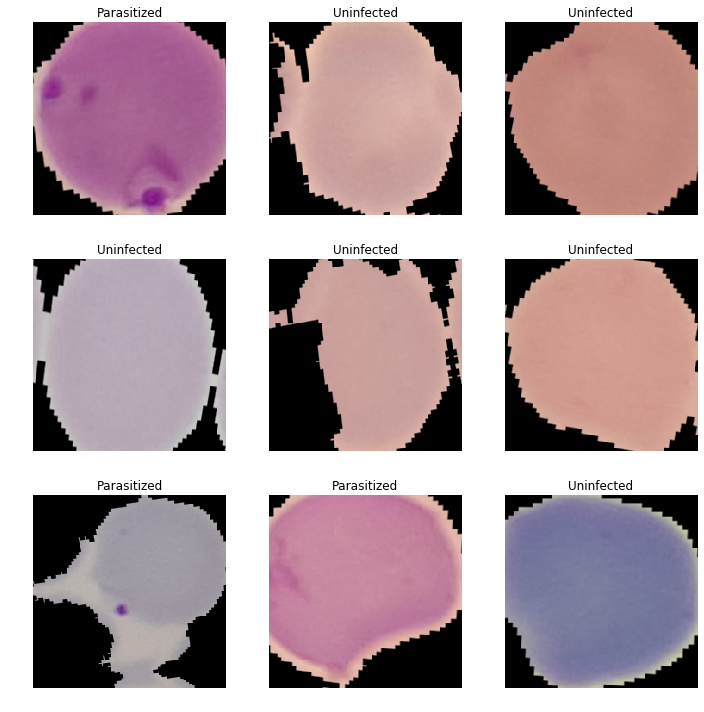

In [0]:

data.show_batch(rows=3, figsize=(10,10))

In the next line we are going to create the acutal AI model.

Just like we can use different cars (with different horse pwers, passenger capacity etc) to get from point A to point B we can use different  AI architectures to train an AI model. Here we are using a model called Resnet50. 

We are going to use transfer learning. In transfer learning we are using a model trained on millions of images and transfer that knowlwdge into our initial model and fine tune this to meet our requirement - find cells infected with malaria. 

metrics = accuracy - here we are using "accuracy" as our metric to be displayed. 

callback_fns=ShowGraph - this will plot a training and validation graph. 


In [0]:
learn = cnn_learner(data, models.resnet50, pretrained=True, metrics = accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 16501875.85it/s]


We are fine tuning our model to our data in the following line. We are iterating 5 times over our entire data. 

1e-02 is the learning rate we are using. 

Hang in there, this is going to take a few minutes.

epoch,train_loss,valid_loss,accuracy,time
0,0.166038,0.140199,0.956814,03:25
1,0.151122,0.131310,0.959717,03:24
2,0.139556,0.111357,0.962983,03:22
3,0.116673,0.083144,0.970241,03:23
4,0.102760,0.077916,0.971874,03:21


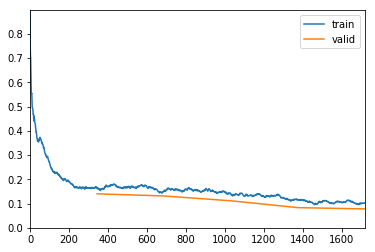

In [0]:
learn.fit_one_cycle(5, 1e-02)

Looks like we got an accuracy of 97.18%. 

in the next few lines we will plot a confusion matrix. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

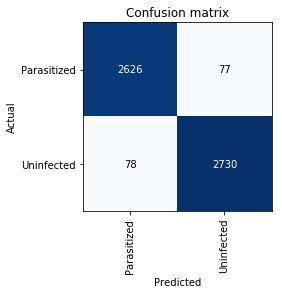

In [0]:
interp.plot_confusion_matrix()


Sensitivity	Sensitivity	97.15%	96.45% to 97.75%

Specificity	Specificity	97.22 %	96.55% to 97.80%

Positive Likelihood Ratio	Positive Likelihood Ratio	34.97	28.10 to 43.53

Negative Likelihood Ratio	Negative Likelihood Ratio	0.03	0.02 to 0.04

Disease prevalence	Prevalence	49.05% (*)	47.72% to 50.38%

Positive Predictive Value	Positive Predicitive Value	97.12% (*)	96.43% to 97.67%

Negative Predictive Value	Negative Predicitive Value	97.26 % (*)	96.60% to 97.79%

Accuracy	Accuracy	97.19% (*)	96.72% to 97.61%

[To access the diagnostic test calculator, click here](https://www.medcalc.org/calc/diagnostic_test.php)


---



To acess FastAI tutorial, [click here.](https://course.fast.ai/)


---



An article on learning rate can be [accessed here.](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)